# [Симулятор коэффициента корреляции Пирсона](https://rpsychologist.com/correlation/)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp, mannwhitneyu, pearsonr
from scipy import stats

# Task_1

In [ ]:
!wget 'https://www.dropbox.com/scl/fi/p1x0qh6dwpggxttdi562r/mashina_dataset.csv?rlkey=9tpvw11bsf36loyrzqg2up27q&dl=0'

In [ ]:
df = pd.read_csv('mashina_dataset.csv?rlkey=9tpvw11bsf36loyrzqg2up27q&dl=0')

In [ ]:
df.dropna(subset=['Год выпуска', 'Пробег'], inplace=True)
df['Год выпуска'] = df['Год выпуска'].map(lambda i: int(i[:4]))
df['Пробег'] = df['Пробег'].map(lambda i: i.replace(' км', '')).astype(int)
df['круиз-контроль'].fillna(0, inplace=True)
df['likes'].fillna(0, inplace=True)

In [ ]:
df = df[['brand', 'model', 'location', 'views', 'likes', 'usd_price', 'Год выпуска', 'Пробег', 'круиз-контроль']]

Мы имеем рыночные данные по автомобилям с сайта Mashina.kg. Давайте изучим фрагмент этих данных.
* Какие типы признаков нам даны?
* О чем нам говорит корреляционная таблица? Сделайте выводы о взаимовлиянии признаков.
* Изучите график со значениями коэффициента детерминации между стоимостью и каждым другим признаком.

In [ ]:
df.head(10)

,brand,model,location,views,likes,usd_price,Год выпуска,Пробег,круиз-контроль
0,Lexus,LX,Бишкек,2367.0,1.0,88000.0,2015,125000,1.0
1,Kia,Rio,Бишкек,1005.0,7.0,18500.0,2020,50000,0.0
2,Toyota,Land Cruiser,Бишкек,666.0,0.0,49500.0,2013,100000,0.0
3,Lexus,GX,Бишкек,3557.0,6.0,25900.0,2005,180000,1.0
4,Lexus,LX,Бишкек,3744.0,5.0,98000.0,2017,55000,1.0
5,Lexus,LX,Ош,2980.0,10.0,38000.0,2010,178000,1.0
6,Lexus,GX,Бишкек,4913.0,5.0,65000.0,2017,91500,0.0
7,Lexus,RX,Бишкек,1705.0,3.0,54500.0,2017,66000,1.0
8,Mercedes-Benz,V-класс,Бишкек,8371.0,11.0,200000.0,2023,24,1.0
9,Honda,Crosstour,Бишкек,2087.0,7.0,18000.0,2010,155000,0.0


In [ ]:
df.corr() # corr matrix

<ipython-input-7-a52b01907b5e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() # corr matrix


,views,likes,usd_price,Год выпуска,Пробег,круиз-контроль
views,1.000000,0.624219,0.132680,0.066825,-0.073823,0.061342
likes,0.624219,1.000000,-0.074508,-0.126446,0.082034,0.009957
usd_price,0.132680,-0.074508,1.000000,0.500794,-0.407188,0.155805
Год выпуска,0.066825,-0.126446,0.500794,1.000000,-0.614342,0.296097
Пробег,-0.073823,0.082034,-0.407188,-0.614342,1.000000,-0.171557
круиз-контроль,0.061342,0.009957,0.155805,0.296097,-0.171557,1.000000


Иллюстрация корреляционной матрицы

<ipython-input-8-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

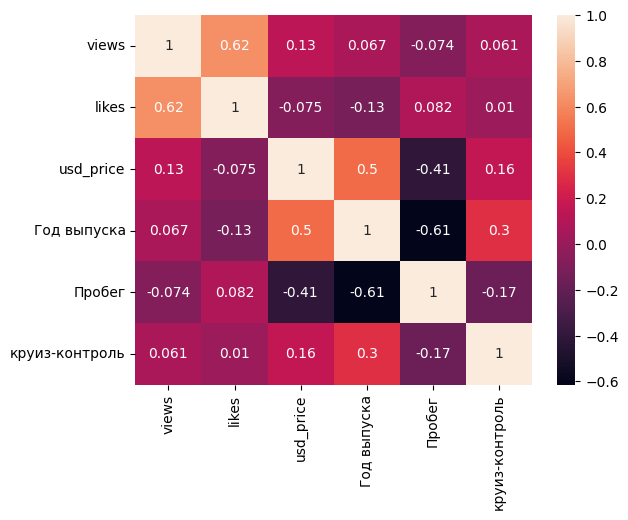

In [ ]:
sns.heatmap(df.corr(), annot = True)

Иллюстрация коэффициента детерминации

In [ ]:
corr = df.corr().usd_price**2
corr = corr.sort_values(ascending=False)[1:]

<ipython-input-9-8318fd3ab03d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().usd_price**2


Text(0, 0.5, 'Features')

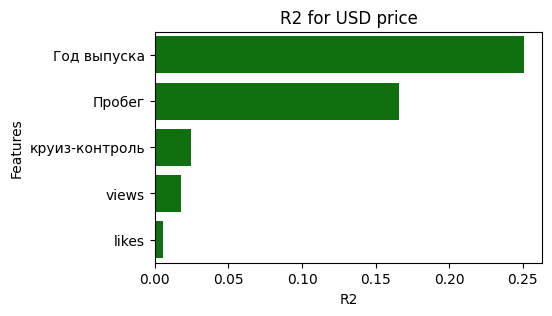

In [ ]:
plt.subplots(figsize=(5, 3))
sns.barplot(x = corr, y=corr.index, color='green').set_title('R2 for USD price')
plt.xlabel('R2')
plt.ylabel('Features')

In [ ]:
col = ['views', 'likes', 'Год выпуска', 'Пробег', 'круиз-контроль']

# Task_2

У нас тот же набор данных. Давайте изучим графики и оценим адекватность корреляционного анализа, который мы провели до этого?

* Проведите корреляционный тест `pearsonr` для стоимости авто и для пробега.
* Проведите корреляционный тест для стоимости авто и пробега только для Тойоты Камри. Постройте Скаттерплот.

<Axes: xlabel='круиз-контроль', ylabel='usd_price'>

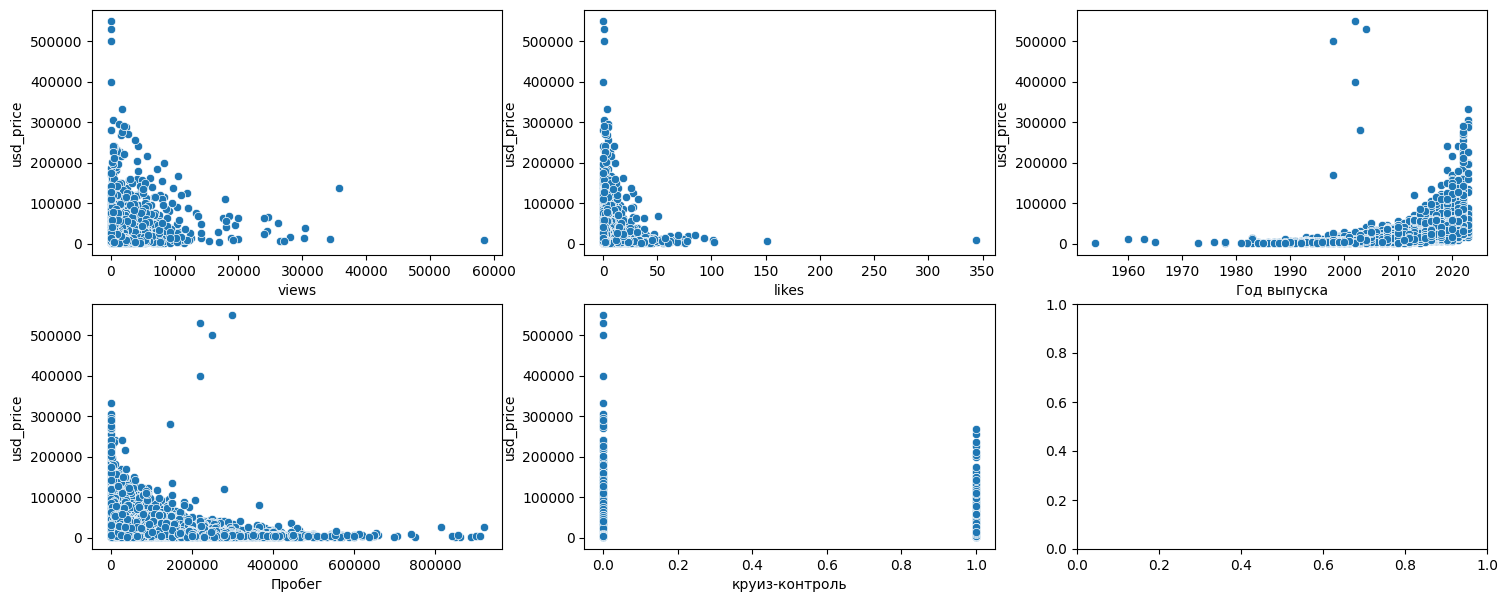

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(18, 7))
sns.scatterplot(x = df[col[0]], y=df.usd_price, ax=ax[0, 0])
sns.scatterplot(x = df[col[1]], y=df.usd_price, ax=ax[0, 1])
sns.scatterplot(x = df[col[2]], y=df.usd_price, ax=ax[0, 2])
sns.scatterplot(x = df[col[3]], y=df.usd_price, ax=ax[1, 0])
sns.scatterplot(x = df[col[4]], y=df.usd_price, ax=ax[1, 1])

In [ ]:
price = np.array(df.usd_price)
mileage = np.array(df['Пробег'])
model= np.array(df.model) # Camry

# Task_3

* Выясните, влияет ли наличие Круиз-контроля на ценообразование. Какой тип теста вы выберете?

In [ ]:
col = ['views', 'likes', 'Год выпуска', 'Пробег', 'круиз-контроль', 'usd_price']
df[col].head()

,views,likes,Год выпуска,Пробег,круиз-контроль,usd_price
0,2367.0,1.0,2015,125000,1.0,88000.0
1,1005.0,7.0,2020,50000,0.0,18500.0
2,666.0,0.0,2013,100000,0.0,49500.0
3,3557.0,6.0,2005,180000,1.0,25900.0
4,3744.0,5.0,2017,55000,1.0,98000.0


In [ ]:
mashina = np.array(df[col])
mashina

array([[2.3670e+03, 1.0000e+00, 2.0150e+03, 1.2500e+05, 1.0000e+00,
        8.8000e+04],
       [1.0050e+03, 7.0000e+00, 2.0200e+03, 5.0000e+04, 0.0000e+00,
        1.8500e+04],
       [6.6600e+02, 0.0000e+00, 2.0130e+03, 1.0000e+05, 0.0000e+00,
        4.9500e+04],
       ...,
       [5.0500e+02, 3.0000e+00, 2.0000e+03, 2.0000e+05, 0.0000e+00,
        3.4130e+03],
       [1.9100e+02, 0.0000e+00, 2.0100e+03, 1.9000e+05, 0.0000e+00,
        4.0000e+04],
       [3.7370e+03, 2.0000e+00, 2.0070e+03, 1.2345e+05, 0.0000e+00,
        3.4130e+03]])

# Task_4

Возьмем автомобили Тойота Камри с пробегом более 100 000 км. Есть ли значимое различие в цене на эти автомобили в Бишкеке и в городе Ош?

In [ ]:
col = ['model', 'Пробег', 'location', 'usd_price']
df[col].head()

,model,Пробег,location,usd_price
0,LX,125000,Бишкек,88000.0
1,Rio,50000,Бишкек,18500.0
2,Land Cruiser,100000,Бишкек,49500.0
3,GX,180000,Бишкек,25900.0
4,LX,55000,Бишкек,98000.0


In [ ]:
mashin = np.array(df[col])
mashin

array([['LX', 125000, 'Бишкек', 88000.0],
       ['Rio', 50000, 'Бишкек', 18500.0],
       ['Land Cruiser', 100000, 'Бишкек', 49500.0],
       ...,
       ['March', 200000, 'Бишкек', 3413.0],
       ['LX', 190000, 'Бишкек', 40000.0],
       ['2107', 123450, 'Ош', 3413.0]], dtype=object)

# Task_5

Сгенерите два множества $x$ и $y$:
* x_mean = 10
* y_mean = 30
* cor = -0.7
* size = 200

Постройте Скаттерплот.

# Task_6

Сгенерите данные из 4 признаков в количестве 200 наблюдений и сохраните в переменную `arr`. Ниже в коде даны характеристики. Запустите код визуализации.

In [ ]:
mean = [10, 2000, 5000, 4]
corr = [[1, 0.02, 0.9, -0.4],
        [0.02, 1, -0.3, 0.5],
        [0.9, -0.3, 1, -0.1],
        [-0.4, 0.5, -0.1, 1]]

In [ ]:
sns.pairplot(pd.DataFrame(arr))  # Визуализация